In [1]:
import numpy as np
import pandas as pd
import gc
import time
import warnings
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.gridspec as gridspec 
import matplotlib.gridspec as gridspec 
color = sns.color_palette()
sns.set_style("dark")
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
%%time
import json

reviews = []
with open("yelp_academic_dataset_review.json", encoding='utf-8') as f:
    for line in f:
        reviews.append(json.loads(line))

Wall time: 49.4 s


In [3]:
reviewsDF = pd.DataFrame.from_records(reviews)

In [4]:
reviewsDF.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g
3,elqbBhBfElMNSrjFqW3now,0,2011-02-25,0,Er4NBWCmCD4nM8_p1GRdow,2,Back in 2005-2007 this place was my FAVORITE t...,2,msQe1u7Z_XuqjGoqhB0J5g
4,Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0,jsDu6QEJHbwP2Blom1PLCA,5,Delicious healthy food. The steak is amazing. ...,0,msQe1u7Z_XuqjGoqhB0J5g


In [5]:
reviewsDF.shape

(5996996, 9)

In [6]:
#Get the distribution of the ratings
x=reviewsDF['stars'].value_counts()
x=x.drop([0])
x=x.sort_index()

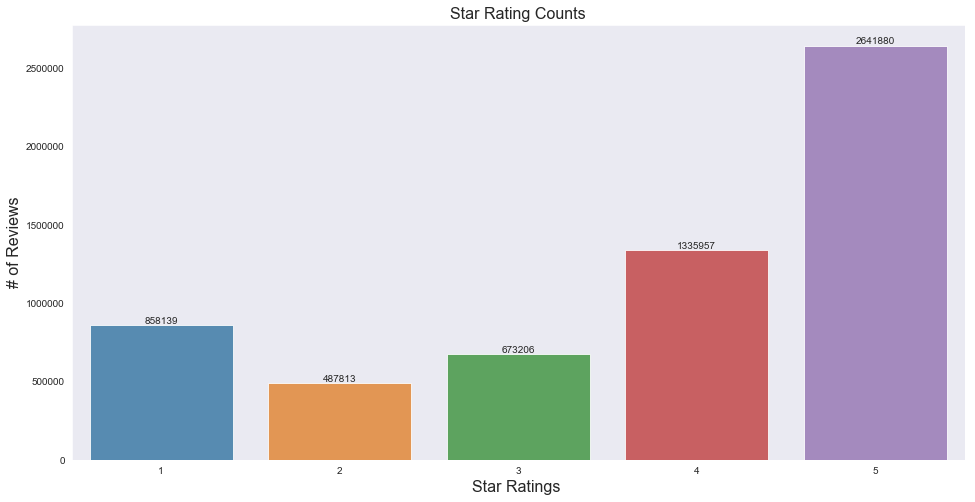

In [7]:
#plot
plt.figure(figsize=(16,8))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Counts", fontsize=16)
plt.ylabel('# of Reviews', fontsize=16)
plt.xlabel('Star Ratings ', fontsize=16)

#Labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [8]:
userAggregate=reviewsDF.groupby('user_id').agg({'review_id':['count'],'date':['min','max'],
                                'useful':['sum'],'funny':['sum'],'cool':['sum'],
                               'stars':['mean']})
userAggregate=userAggregate.sort_values([('review_id','count')],ascending=False)
print("Top 10 Users with the most reviews")
userAggregate.head(10)

Top 10 Users with the most reviews


review_id        date             useful  funny   cool  \
                           count         min         max    sum    sum    sum   
user_id                                                                         
CxDOIDnH8gp9KXzpBHJYXw      3739  2009-11-09  2018-06-27  12835   5883   7606   
bLbSNkLggFnqwNNzzq-Ijw      2229  2012-05-20  2018-07-01  26910  13851  18481   
PKEzKWv_FktMm2mGPjwd0Q      1674  2008-12-12  2018-07-01  12804   5259   8724   
DK57YibC5ShBmqQl97CKog      1574  2006-02-12  2018-07-01  19096  10150  16319   
QJI9OSEn6ujRCtrX06vs1w      1324  2007-03-20  2016-05-01   8791   4118   6159   
d_TBs6J3twMy9GChqUEXkg      1245  2010-12-27  2018-05-29   3149   1443   1902   
hWDybu_KvYLSdEFzGrniTw      1220  2009-03-08  2018-06-11   8170   5459   6517   
ELcQDlf69kb-ihJfxZyL0A      1204  2011-04-10  2018-06-29   2243   1352   1058   
cMEtAiW60I5wE_vLfTxoJQ      1201  2009-06-12  2018-06-26   2246    967   1761   
YRcaNlwQ6XXPFDXWtuMGdA      1195  2009-06-16  2018-05-05   2630   1088   1262   

                           stars  
                            mean  
user_id                           
CxDOIDnH8gp9KXzpBHJYXw  3.218775  
bLbSNkLggFnqwNNzzq-Ijw  3.274114  
PKEzKWv_FktMm2mGPjwd0Q  3.658303  
DK57YibC5ShBmqQl97CKog  3.817662  
QJI9OSEn6ujRCtrX06vs1w  3.621601  
d_TBs6J3twMy9GChqUEXkg  3.478715  
hWDybu_KvYLSdEFzGrniTw  3.650000  
ELcQDlf69kb-ihJfxZyL0A  2.989203  
cMEtAiW60I5wE_vLfTxoJQ  4.081599  
YRcaNlwQ6XXPFDXWtuMGdA  3.395816

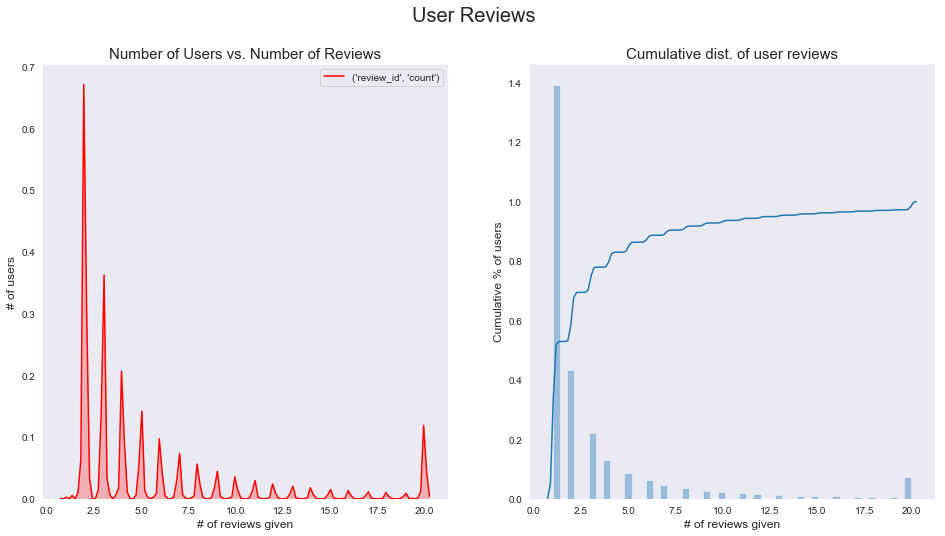

In [9]:
# Any users with reviews greater than 20, will be sent to 20 to reduce width of the plot.
userAggregate[('review_id','count')].loc[userAggregate[('review_id','count')]>30] = 30
plt.figure(figsize=(16,8))
plt.suptitle("User Reviews",fontsize=20)
gridspec.GridSpec(1,2)
plt.subplot2grid((1,2),(0,0))
# Plot 1
ax=sns.kdeplot(userAggregate[('review_id','count')],shade=True,color='r')
plt.title("Number of Users vs. Number of Reviews",fontsize=15)
plt.xlabel('# of reviews given', fontsize=12)
plt.ylabel('# of users', fontsize=12)

#Cumulative Distribution
plt.subplot2grid((1,2),(0,1))
sns.distplot(userAggregate[('review_id','count')],kde_kws=dict(cumulative=True))
plt.title("Cumulative dist. of user reviews",fontsize=15)
plt.ylabel('Cumulative % of users', fontsize=12)
plt.xlabel('# of reviews given', fontsize=12)

plt.show()

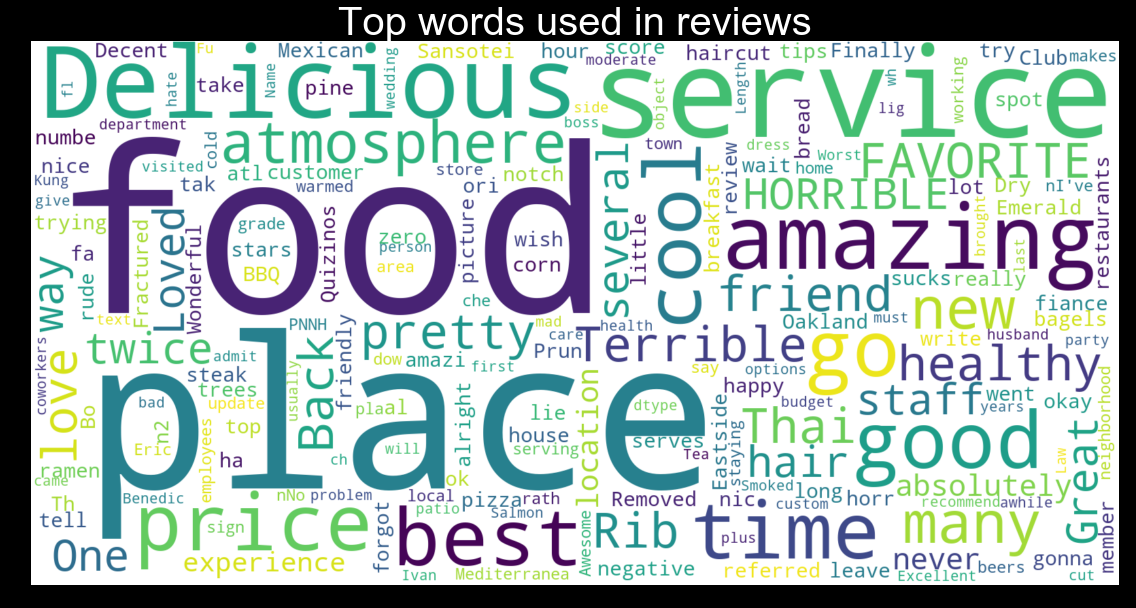

In [10]:
from wordcloud import WordCloud, STOPWORDS
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000,background_color='white')
wc.generate(str(reviewsDF['text']))
# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')
plt.title("Top words used in reviews", fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

plt.show()